
 **Machine Learning Project **

Name: Singa Saiprasad

Title:-**NEURAL NETWORK-BASED HANDWRITTEN DIGIT RECOGNITION **


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1)
Download and install TensorFlow from
https://www.tensorflow.org/install/install_sources or using command
`sudo pip install tensorflow` alternatively the Keras library can be used.

2)Download MNIST dataset (contains class labels for digits 0-9). using
the command:

```python
import tensorflow as tf
data = tf.contrib.learn.datasets.mnist.load_mnist()
```
or
```python
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

In [4]:
import tensorflow as tf
from matplotlib import pyplot as plt
mnist_data = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
mnist_data


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

mnist_data is a Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [6]:
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist_data

# mapping 0-255 to 0-1
x_train = np.array([img/255 for img in x_train])
x_test = np.array([img/255 for img in x_test])

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


3)Reduce the training size by 1/10 if computation resources are limited.

Define radial basis function (RBF) as

```python
def RBF(x, c, s):
    return np.exp(-np.sum((x-c)**2, axis=1)/(2*s**2))
```
where, x is the actual value, c is centre (assumed as mean) and s is the standard deviation.

Converted 28\*28 image into 32\*32 using rbf and store the new dataset with the labels. Split the dataset as 80% training and 10% validation
and 10% test.

In [7]:
import numpy as np


def RBF(x, c, s):
    return np.exp(-np.sum((x-c)**2, axis=1)/(2*s**2))

# TODO: used simple scaling to upscale the image,
# use rbf to do this in future


In [8]:
from tensorflow.image import resize

# reshape to convert 28x28 image (assumed greyscale)
# to 28x28x1 (1 denoting only one value per pixel
# [rgb will have three numbers for eg])

def transform(image):
    image = np.pad(image, (2, 2))
    c = np.mean(image)
    s = np.std(image)
    return RBF(image, c, s).flatten()
# flatten reduces each image into a 1-D array by storing it in row-major format


x_train_tf=[]
x_test_tf=[]
for image in x_train:
    x_train_tf.append(transform(image))
x_train_tf = np.array(x_train_tf)
print("Shape of x_train after transforming: ", x_train_tf.shape)

for image in x_test:
    x_test_tf.append(transform(image))
x_test_tf = np.array(x_test_tf)
print("Shape of x_test after transforming: ", x_test_tf.shape)



# x_train = np.reshape(x_train, (-1, 28, 28, 1))
# x_train = np.array([resize(img, [32, 32]) for img in x_train])
# print(f"x_train shape: {x_train.shape}")

# x_test = np.reshape(x_test, (-1, 28, 28, 1))
# x_test = np.array([resize(img, [32, 32]) for img in x_test])
# print(f"x_test shape: {x_test.shape}")


Shape of x_train after transforming:  (60000, 32)
Shape of x_test after transforming:  (10000, 32)


In [9]:
import pandas as pd
# convert y to categorical
y_train = pd.get_dummies(y_train).to_numpy()
y_test = pd.get_dummies(y_test).to_numpy()


In [10]:
y_train[0:9]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [11]:
print(x_train[25].shape)


(28, 28)


In [12]:
input_shape = x_train[0].shape
num_classes = len(y_train[0])


4)Now run the fully connected network after flattening the data by changing the number the hyper-parameters use adam optimizer(learning rate = 0.001) and categorical cross-entropy loss

| Hidden Layers  | Activation Function  | Hidden Neurons    |
|----------------|----------------------|-------------------|
| 1              | Sigmoid              | \[16\]            |
| 2              | Sigmoid              | \[16,32\]         |
| 3              | Sigmoid              | \[16,32,64\]      |

In [13]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


def train_model(
        activation_function: 'str',
        hidden_neurons: 'list[int]',
        dropout_rate: 'float | None' = None,
        adam_learn_rate=0.001,
        verbose=True):

    model = Sequential()
    model.add(Input(shape=(input_shape)))
    model.add(Flatten())

    for unit in hidden_neurons[::-1]:
        model.add(Dense(unit, activation=activation_function))
        if dropout_rate is not None:
            model.add(Dropout(rate=dropout_rate))

    # softmax as it gives probabilistic value
    # (sum of all the last nodes will be 1)
    model.add(Dense(num_classes, activation='softmax'))

    if verbose:
        model.summary()

    model.compile(optimizer=Adam(learning_rate=adam_learn_rate),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(x=x_train,
                        y=y_train,
                        validation_split=0.1,
                        epochs=100,
                        callbacks=[
                            EarlyStopping(
                                monitor='val_loss',
                                patience=5,
                                restore_best_weights= True
                            )
                        ],
                        verbose='auto' if verbose else 0
                        )

    return model, history


def plot_history(
        history: "tf.keras.callbacks.History",
        activation_function: 'str',
        hidden_neurons: 'list[int]',
        dropout_rate: 'float | None' = None):

    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.ylabel('Training Loss')
    plt.xlabel('Epoch')
    plt.legend()

    if dropout_rate is None:
        plt.title(
            f'Loss vs epoch for {activation_function} {hidden_neurons}')
    else:
        plt.title(
            f'Loss vs epoch for {activation_function} {hidden_neurons} dropout {dropout_rate}')

    plt.show()

    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

    if dropout_rate is None:
        plt.title(
            f'Accuracy vs epoch for {activation_function} {hidden_neurons}')
    else:
        plt.title(
            f'Accuracy vs epoch for {activation_function} {hidden_neurons} dropout {dropout_rate}')

    plt.legend()
    plt.show()


In [14]:
result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Test Loss',
        'Test Acccuracy'],
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.8473 - accuracy: 0.8224 - val_loss: 0.3763 - val_accuracy: 0.9177
Epoch 2/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3623 - accuracy: 0.9073 - val_loss: 0.2594 - val_accuracy: 0

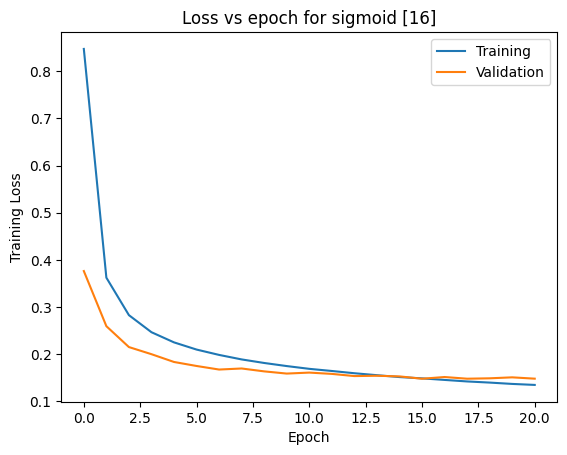

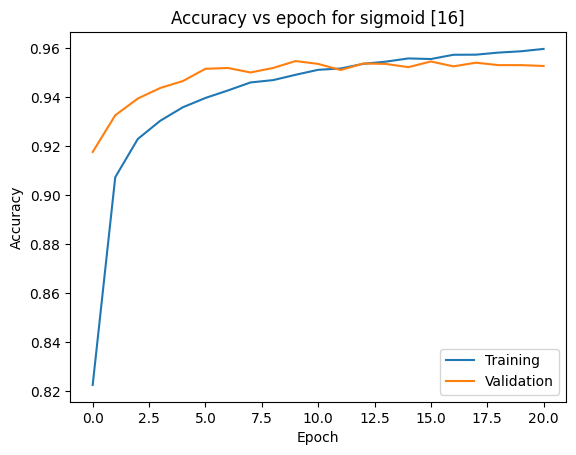

In [15]:
hidden_neurons = [16]
activation_function = 'sigmoid'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 25818 (100.85 KB)
Trainable params: 25818 (100.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.9516 - accuracy: 0.7991 - val_loss: 0.3704 - val_accuracy: 0.9225
Epo

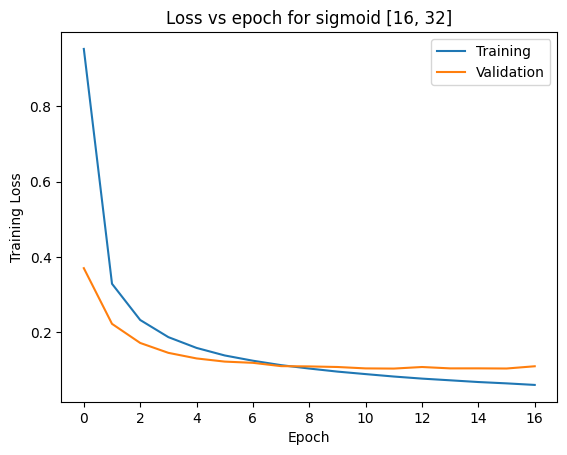

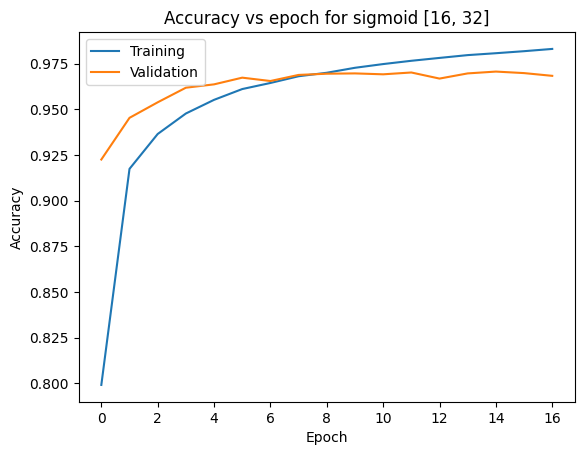

In [16]:
activation_function = 'sigmoid'
hidden_neurons = [16, 32]

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1688

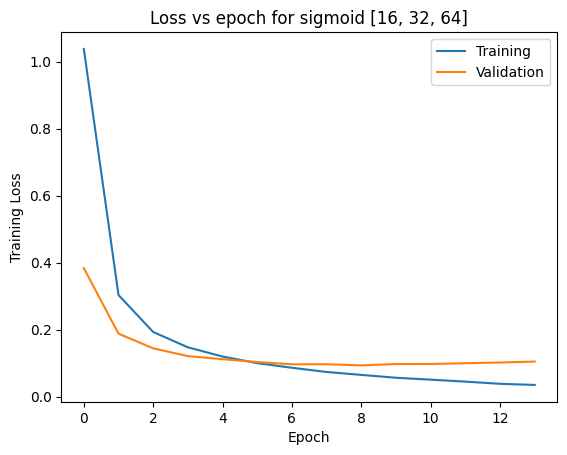

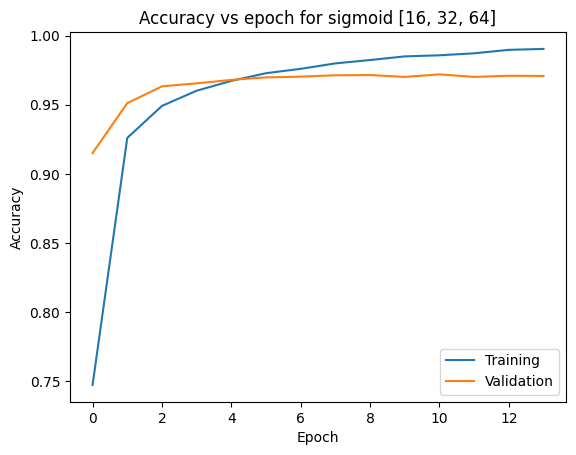

In [17]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


In [18]:
result


,Hidden Layers,Activation Function,Hidden Neurons,Test Loss,Test Acccuracy
0,1,sigmoid,[16],0.178779,0.9476
1,2,sigmoid,"[16, 32]",0.125161,0.9631
2,3,sigmoid,"[16, 32, 64]",0.114595,0.9675


5)Now run the network by changing the number the Activation Function
hyper-parameters:

| Hidden Layers  | Activation Function  | Hidden Neurons    |
|----------------|----------------------|-------------------|
| 3              | Sigmoid              | \[16,32,64\]      |
| 3              | Tanh                 | \[16,32,64\]      |
| 3              | Relu                 | \[16,32,64\]      |

In [19]:
result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Test Loss',
        'Test Acccuracy'],
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1688

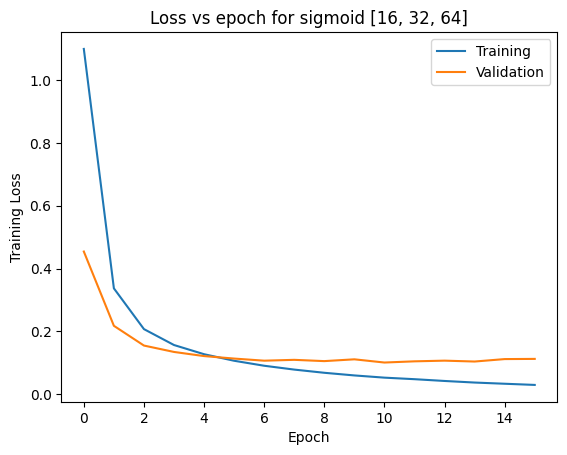

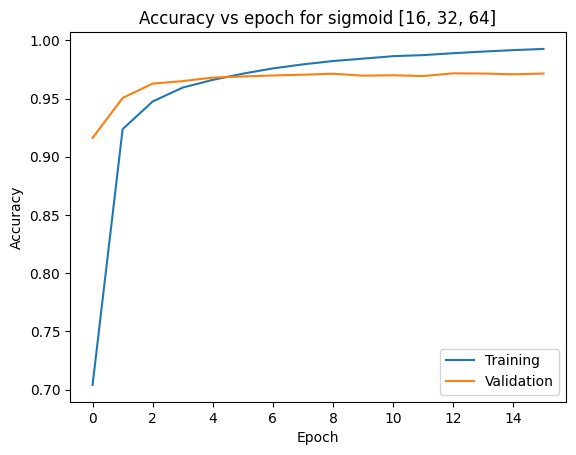

In [20]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1688

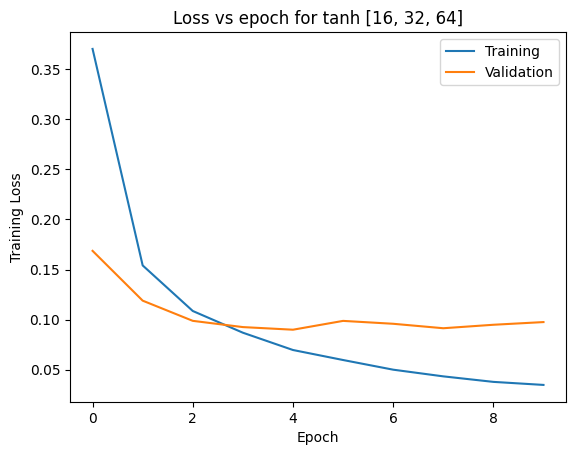

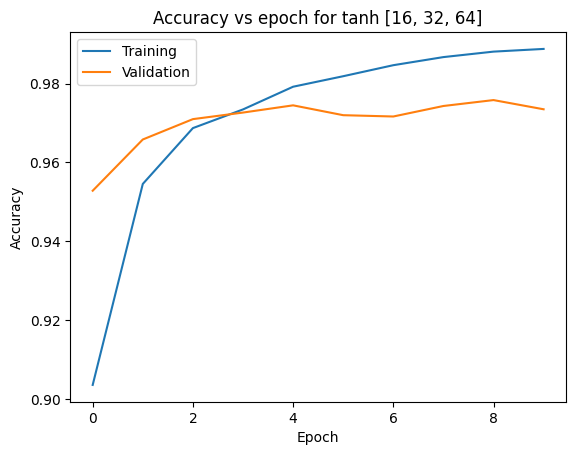

In [21]:
hidden_neurons = [16, 32, 64]
activation_function = 'tanh'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1688

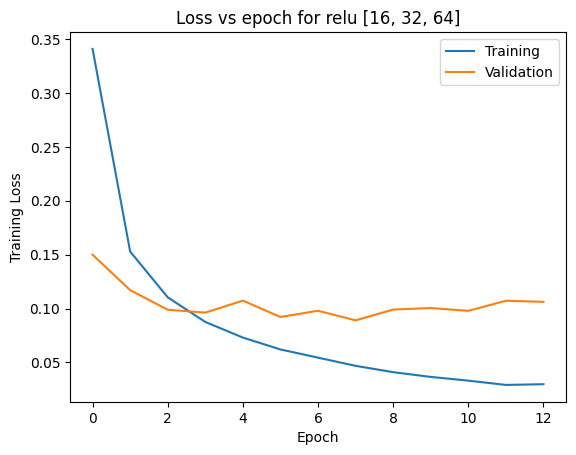

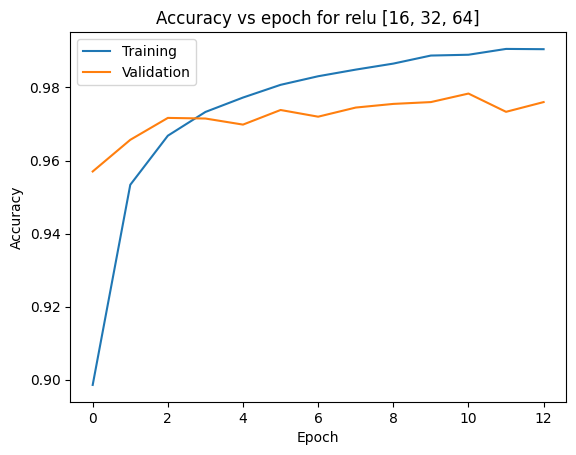

In [22]:
hidden_neurons = [16, 32, 64]
activation_function = 'relu'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


In [23]:
result


,Hidden Layers,Activation Function,Hidden Neurons,Test Loss,Test Acccuracy
0,3,sigmoid,"[16, 32, 64]",0.127953,0.9649
1,3,tanh,"[16, 32, 64]",0.090919,0.9736
2,3,relu,"[16, 32, 64]",0.098296,0.9710


In [24]:
best_activation_fn = result.sort_values(
    by=['Test Acccuracy', 'Test Loss'],
    ascending=[False, True]
    )['Activation Function'].iloc[0]

best_activation_fn

'tanh'

6)Now run the network by changing the number the Dropout hyper-parameters:

| Hidden Layers  | Activation Function  | Hidden Neurons    | Dropout   |
|----------------|----------------------|-------------------|-----------|
| 3              | Relu                 | \[16,32,64\]      |0.9        |
| 3              | Relu                 | \[16,32,64\]      |0.75       |
| 3              | Relu                 | \[16,32,64\]      |0.5        |
| 3              | Relu                 | \[16,32,64\]      |0.25       |
| 3              | Relu                 | \[16,32,64\]      |0.10       |

In [25]:
result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Dropout',
        'Test Loss',
        'Test Acccuracy'],
)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)               

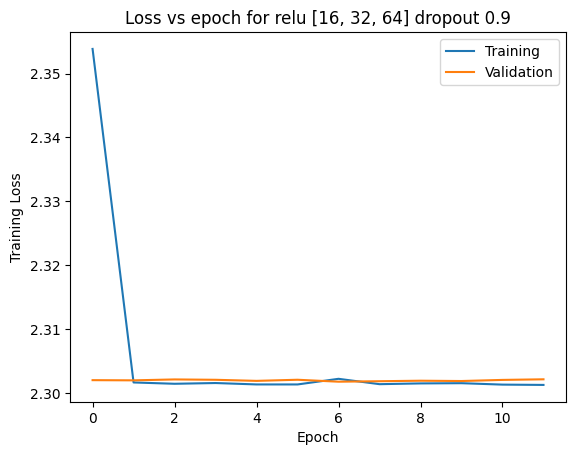

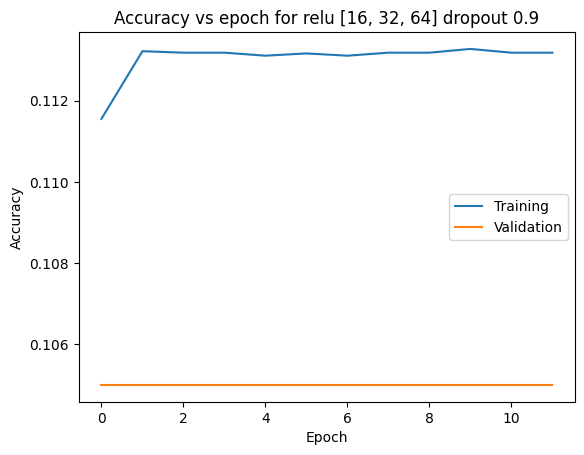

In [26]:
hidden_neurons = [16, 32, 64]
activation_function = 'relu'
dropout_val = 0.9

model, history = train_model(activation_function, hidden_neurons,dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                50240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)               

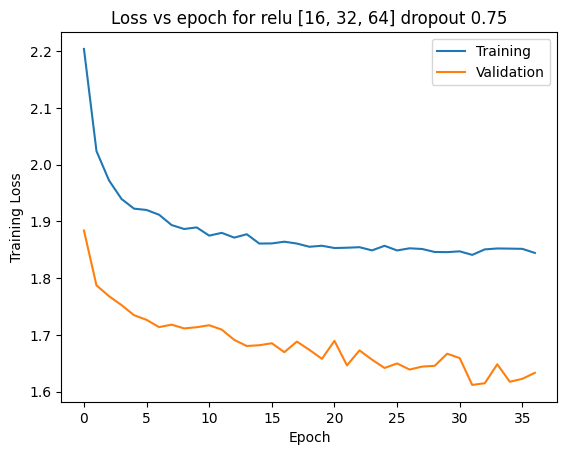

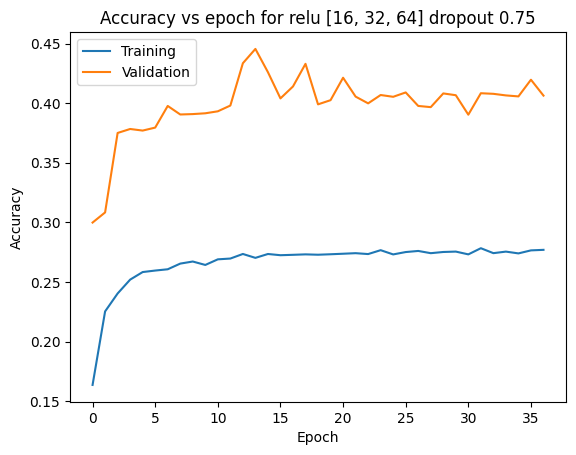

In [27]:
hidden_neurons = [16, 32, 64]
activation_function = 'relu'
dropout_val = 0.75

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)               

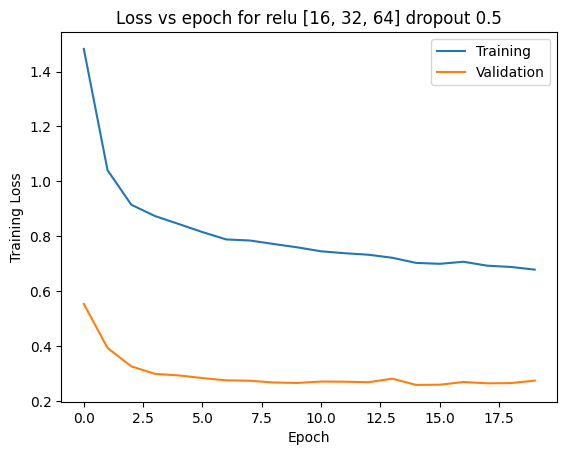

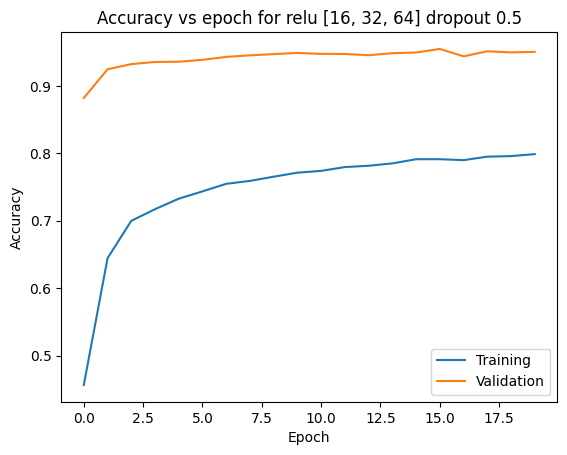

In [28]:
hidden_neurons = [16, 32, 64]
activation_function = 'relu'
dropout_val = 0.5

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                50240     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)               

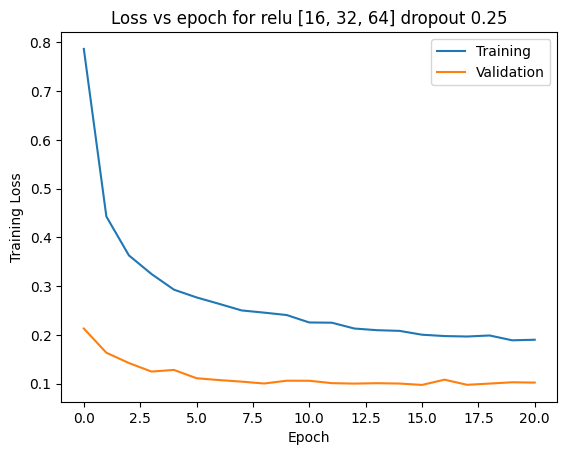

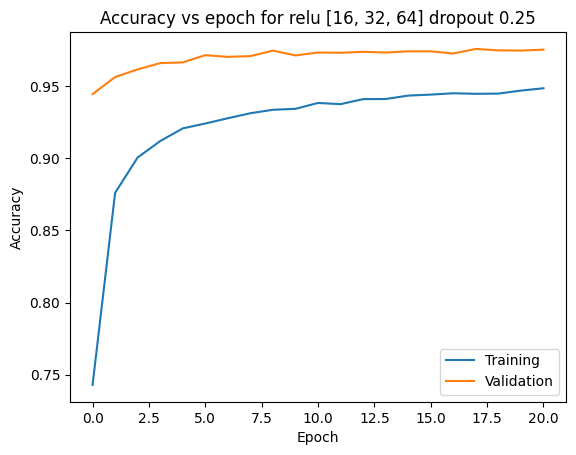

In [29]:
hidden_neurons = [16, 32, 64]
activation_function = 'relu'
dropout_val = 0.25

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                50240     
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dropout_14 (Dropout)        (None, 16)              

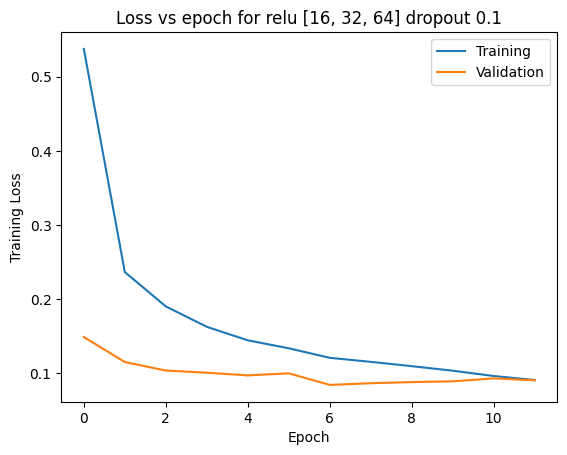

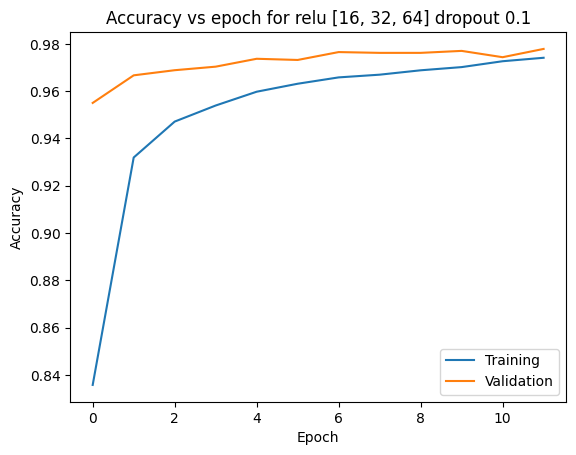

In [30]:
hidden_neurons = [16, 32, 64]
activation_function = 'relu'
dropout_val = 0.1

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


In [31]:
result


,Hidden Layers,Activation Function,Hidden Neurons,Dropout,Test Loss,Test Acccuracy
0,3,relu,"[16, 32, 64]",0.90,2.301211,0.1135
1,3,relu,"[16, 32, 64]",0.75,1.601853,0.4008
2,3,relu,"[16, 32, 64]",0.50,0.308932,0.9331
3,3,relu,"[16, 32, 64]",0.25,0.135343,0.9680
4,3,relu,"[16, 32, 64]",0.10,0.096736,0.9736


In [32]:
best_dropout = result.sort_values(
    by=['Test Acccuracy', 'Test Loss'],
    ascending=[False, True]
    )['Dropout'].iloc[0]

best_dropout

0.1

7)Plot  the  graph  for  loss  vs  epoch  and  accuracy(train,  validation, accuracy) vs epoch for all the above cases. Point out the logic in the report.

8)With  the  best    set    hyperparameter  from  above  run  vary  the
Adam  Optimizer  learning  rate  [0.01,  0.001,  0.005,  0.0001,  0.0005]. Print  the  time  to  achieve  the  best  validation  accuracy  (as  reported before from all run)  for all these five run .

In [33]:
print(f"best activation function: {best_activation_fn}")
print(f"best dropout value: {best_dropout}")

best activation function: tanh
best dropout value: 0.1


In [34]:
import time

result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Dropout',
        'Adam Learn Rate',
        'Time Taken',
        'Test Loss',
        'Test Acccuracy'],
)

In [35]:
hidden_neurons = [16, 32, 64]
adam_learn_rates = [0.01,  0.001,  0.005,  0.0001,  0.0005]

for learn_rate in adam_learn_rates:
    start_time = time.time()
    model, _ = train_model(
        activation_function=best_activation_fn,
        hidden_neurons=hidden_neurons,
        adam_learn_rate=learn_rate,
        dropout_rate=best_dropout,
        verbose=False
    )
    end_time = time.time()

    time_taken = end_time - start_time

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    result.loc[len(result.index)] = [
    len(hidden_neurons),
    best_activation_fn,
    str(hidden_neurons),
    best_dropout,
    learn_rate,
    time_taken,
    test_loss,
    test_acc]


In [36]:
result

,Hidden Layers,Activation Function,Hidden Neurons,Dropout,Adam Learn Rate,Time Taken,Test Loss,Test Acccuracy
0,3,tanh,"[16, 32, 64]",0.1,0.0100,157.511762,0.235740,0.9393
1,3,tanh,"[16, 32, 64]",0.1,0.0010,122.233136,0.100066,0.9725
2,3,tanh,"[16, 32, 64]",0.1,0.0050,84.804303,0.162639,0.9548
3,3,tanh,"[16, 32, 64]",0.1,0.0001,466.381780,0.089396,0.9740
4,3,tanh,"[16, 32, 64]",0.1,0.0005,132.471228,0.092584,0.9736


In [37]:
best_adam_learn_rate = result.sort_values(
    by=['Test Acccuracy', 'Test Loss'],
    ascending=[False, True]
    )['Adam Learn Rate'].iloc[0]

best_adam_learn_rate

0.0001

9)Create  five  image(size  28*28)  containing  a  digit  of  your  won
handwriting and test whether  your trained classifier is able to predict it or not.

In [38]:
model, _ = train_model(
    activation_function=best_activation_fn,
    hidden_neurons=hidden_neurons,
    adam_learn_rate=best_adam_learn_rate,
    dropout_rate=best_dropout,
    verbose=True
)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_61 (Dense)            (None, 64)                50240     
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_62 (Dense)            (None, 32)                2080      
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_63 (Dense)            (None, 16)                528       
                                                                 
 dropout_32 (Dropout)        (None, 16)              

1/1 [==============================] - 0s 115ms/step


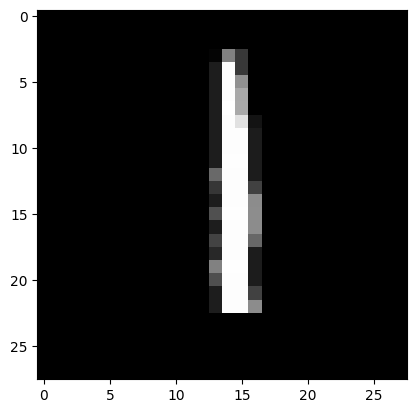

predict = 1


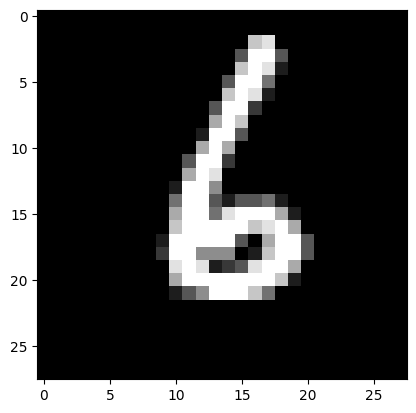

predict = 6


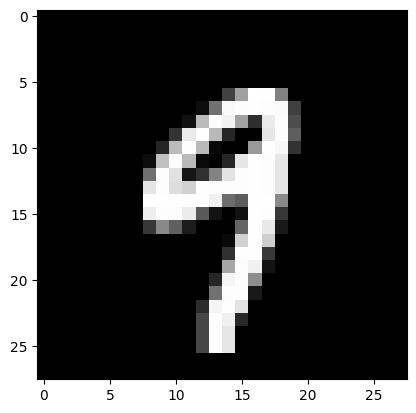

predict = 9


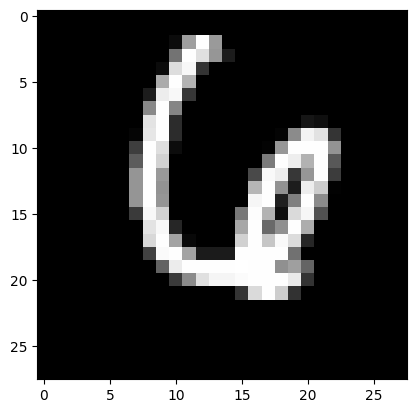

predict = 6


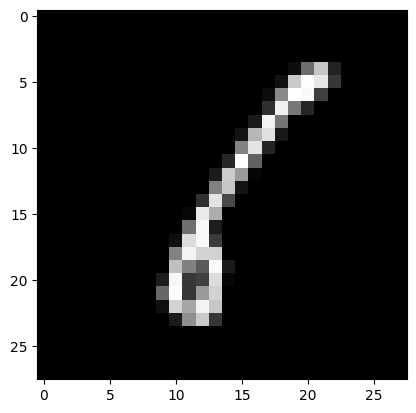

predict = 1


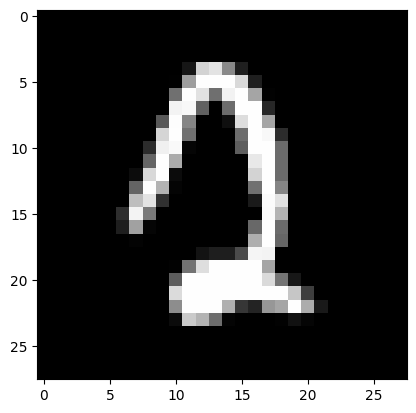

predict = 0


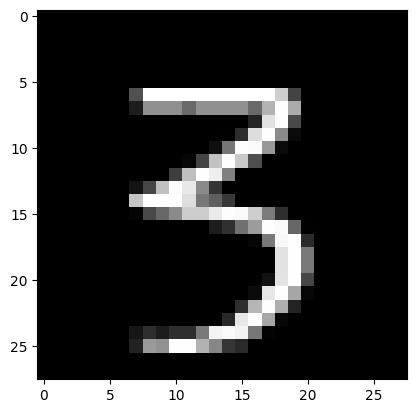

predict = 3


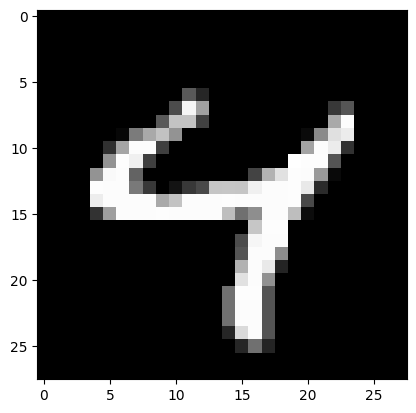

predict = 4


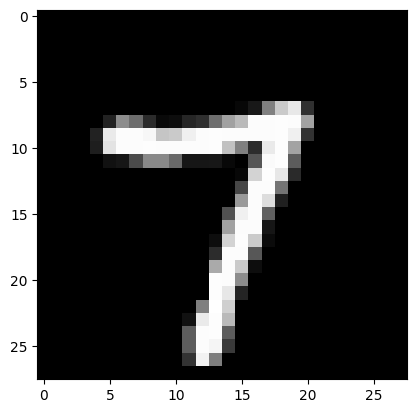

predict = 7


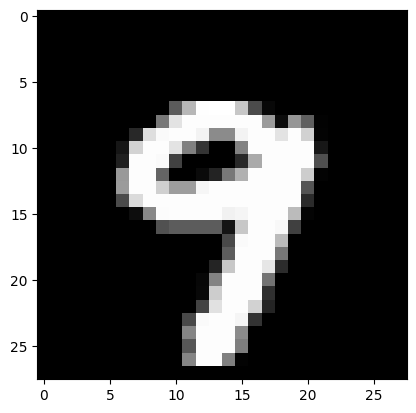

predict = 9


In [39]:
import random

random_idx = random.sample(range(0, len(x_test)), 10)

img_to_predict = np.array([x_test[idx] for idx in random_idx])

categorical_predictions = model.predict(img_to_predict)

for img, cat_pred in zip(img_to_predict, categorical_predictions):
    plt.imshow(img, cmap='gray')
    plt.show()
    pred = np.argmax(cat_pred)
    print(f"predict = {pred}")

